# Drugs Classification Proyect

Matin Mahmoudi (https://www.kaggle.com/matinmahmoudi/)
Kaggle Link: https://www.kaggle.com/code/matinmahmoudi/drug-classification-quick-start-for-beginners
Project Solution by Jacobo Garces for DataPath Academy

The objective of this proyect is to predict the type of Drug that a patient should use, based on their health data. The variables are: Age, Sex, Arterial Pressure (PA), Cholesterol levels, Sodium Levels (Na) and Potasium levels (K) , with "Drugs" as our objective variable. 

We will apply PyCaret to find the best model, and also apply the following models, which are known to be precise for Classification purposes:
- K-Nearest Neighbors (KNN)
- Logistic Regression
- Decision Trees
- Support Vector Machines (SVM)

Description:

The project follows this structure:

1. **Exploración de datos**: Profundizaremos en nuestro conjunto de datos, visualizando y comprendiendo la distribución de características y la variable objetivo, verificando valores faltantes y explorando las relaciones entre diferentes características.

2. **Preprocesamiento de datos**: Los datos se prepararán para el modelado mediante pasos como codificar variables categóricas, escalar características numéricas y dividirlos en conjuntos de datos de entrenamiento y prueba.

3. **Construcción de modelos**: Construiremos y entrenaremos cuatro modelos distintos utilizando los algoritmos antes mencionados, cada uno evaluado en los datos de entrenamiento y prueba.

4. **Evaluación del modelo**: El desempeño de cada modelo se evaluará utilizando métricas adecuadas, con un análisis comparativo para discutir sus fortalezas y debilidades relativas.

5. **Conclusión**: Concluiremos con un resumen de nuestros conocimientos y recomendaciones para seguir aprendiendo o investigando.

# 1. Exploratory Data Analysis

En este paso inicial, nuestro objetivo será explorar el conjunto de datos a fondo para obtener información sobre las diversas características, su distribución y su relación con la variable objetivo ("Droga"). Nuestro objetivo es comprender mejor los datos para informar nuestros pasos posteriores de preprocesamiento y modelado. Nuestra exploración de datos incluirá las siguientes tareas:

1. **Estadísticas resumidas**: comenzaremos examinando las estadísticas resumidas de nuestro conjunto de datos para comprender las tendencias centrales y la dispersión de las características numéricas y observar la distribución de las características categóricas.

2. **Verificación de valores faltantes**: es crucial identificar los valores faltantes dentro de nuestro conjunto de datos, ya que pueden afectar significativamente el rendimiento de nuestros modelos de aprendizaje automático.

3. **Visualización de distribución de datos**: Visualizaremos la distribución de varias características para comprender sus características e identificar patrones o anomalías. Esto incluye histogramas para características numéricas y diagramas de barras para características categóricas.

4. **Análisis de correlación**: comprender las relaciones entre características numéricas puede proporcionar información sobre la estructura del conjunto de datos. Usaremos matrices de correlación para identificar relaciones potenciales.

5. **Análisis de características frente a objetivos**: por último, exploraremos la relación entre cada característica y la variable objetivo ("fármaco") para identificar posibles influencias y tendencias.

Al final de este paso, deberíamos tener una comprensión integral de nuestro conjunto de datos, estableciendo una base sólida para las siguientes etapas de preprocesamiento y modelado.


In [11]:
#Libraries needed for EDA only
# to handle datasets
import pandas as pd
import numpy as np
import seaborn as sns

# for plotting
import matplotlib.pyplot as plt
# Set the aesthetic style of the plots
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

import statsmodels.api as sm


In [3]:
# Load the dataset
data_path = 'Drug.csv'
data = pd.read_csv(data_path)

# Display the first few entries of the dataset
print(data.head())

   Age Sex      BP Cholesterol        Na         K   Drug
0   23   F    HIGH        HIGH  0.792535  0.031258  drugY
1   47   M     LOW        HIGH  0.739309  0.056468  drugC
2   47   M     LOW        HIGH  0.697269  0.068944  drugC
3   28   F  NORMAL        HIGH  0.563682  0.072289  drugX
4   61   F     LOW        HIGH  0.559294  0.030998  drugY


In [4]:
# 0. Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na           200 non-null    float64
 5   K            200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB


In [5]:
# 1. Summary Statistics
data.describe()

,Age,Na,K
count,200.000000,200.000000,200.000000
mean,44.315000,0.697095,0.050174
std,16.544315,0.118907,0.017611
min,15.000000,0.500169,0.020022
25%,31.000000,0.583887,0.035054
50%,45.000000,0.721853,0.049663
75%,58.000000,0.801494,0.066000
max,74.000000,0.896056,0.079788


In [6]:
# 2. Missing Values Check
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na             0
K              0
Drug           0
dtype: int64

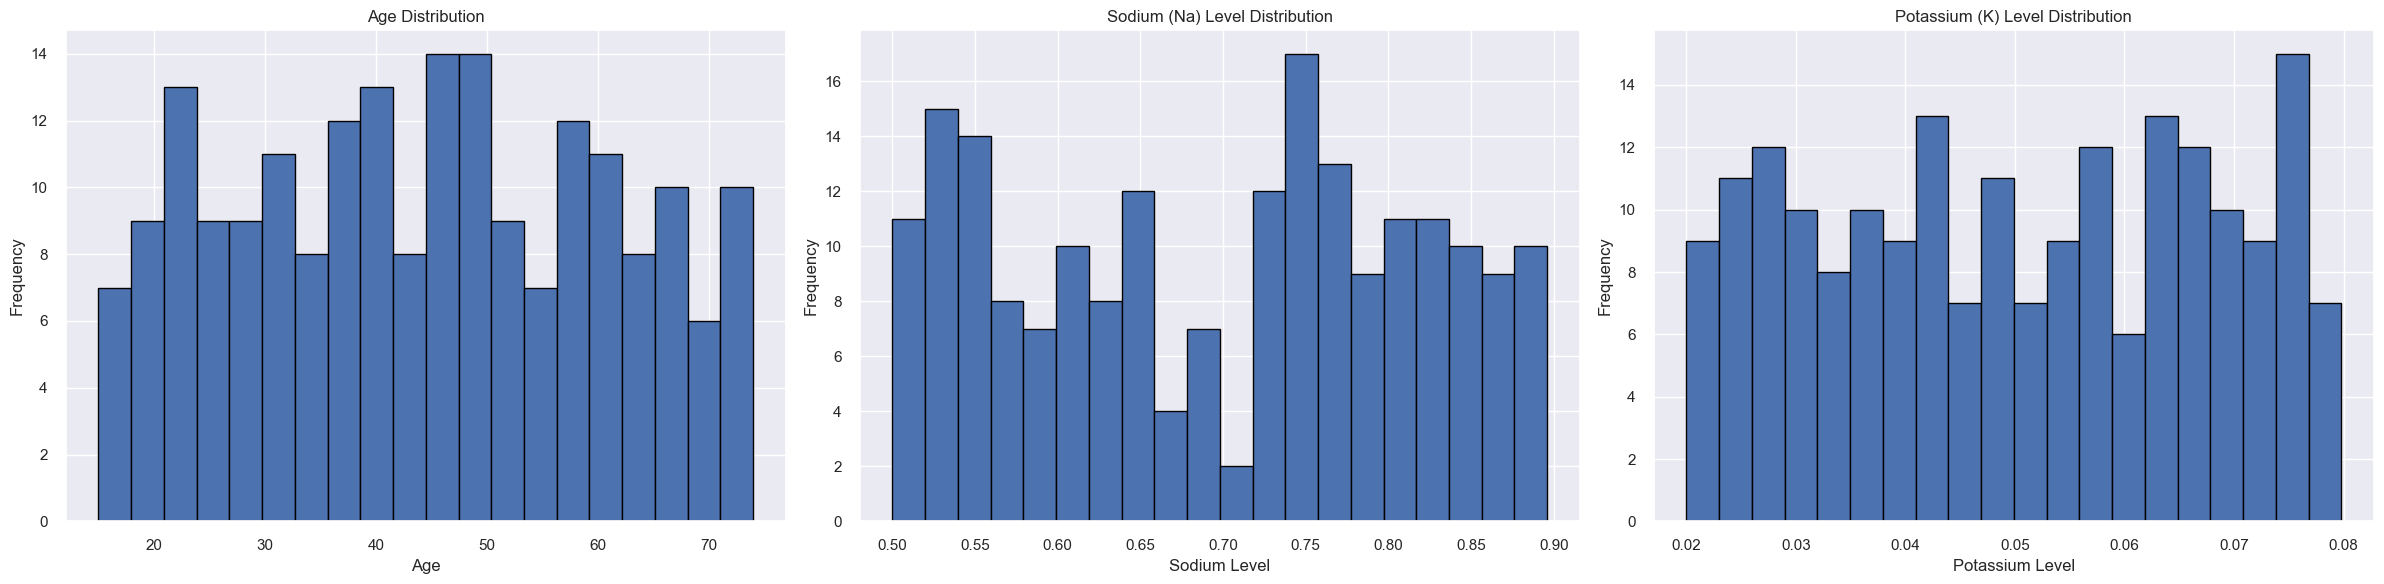

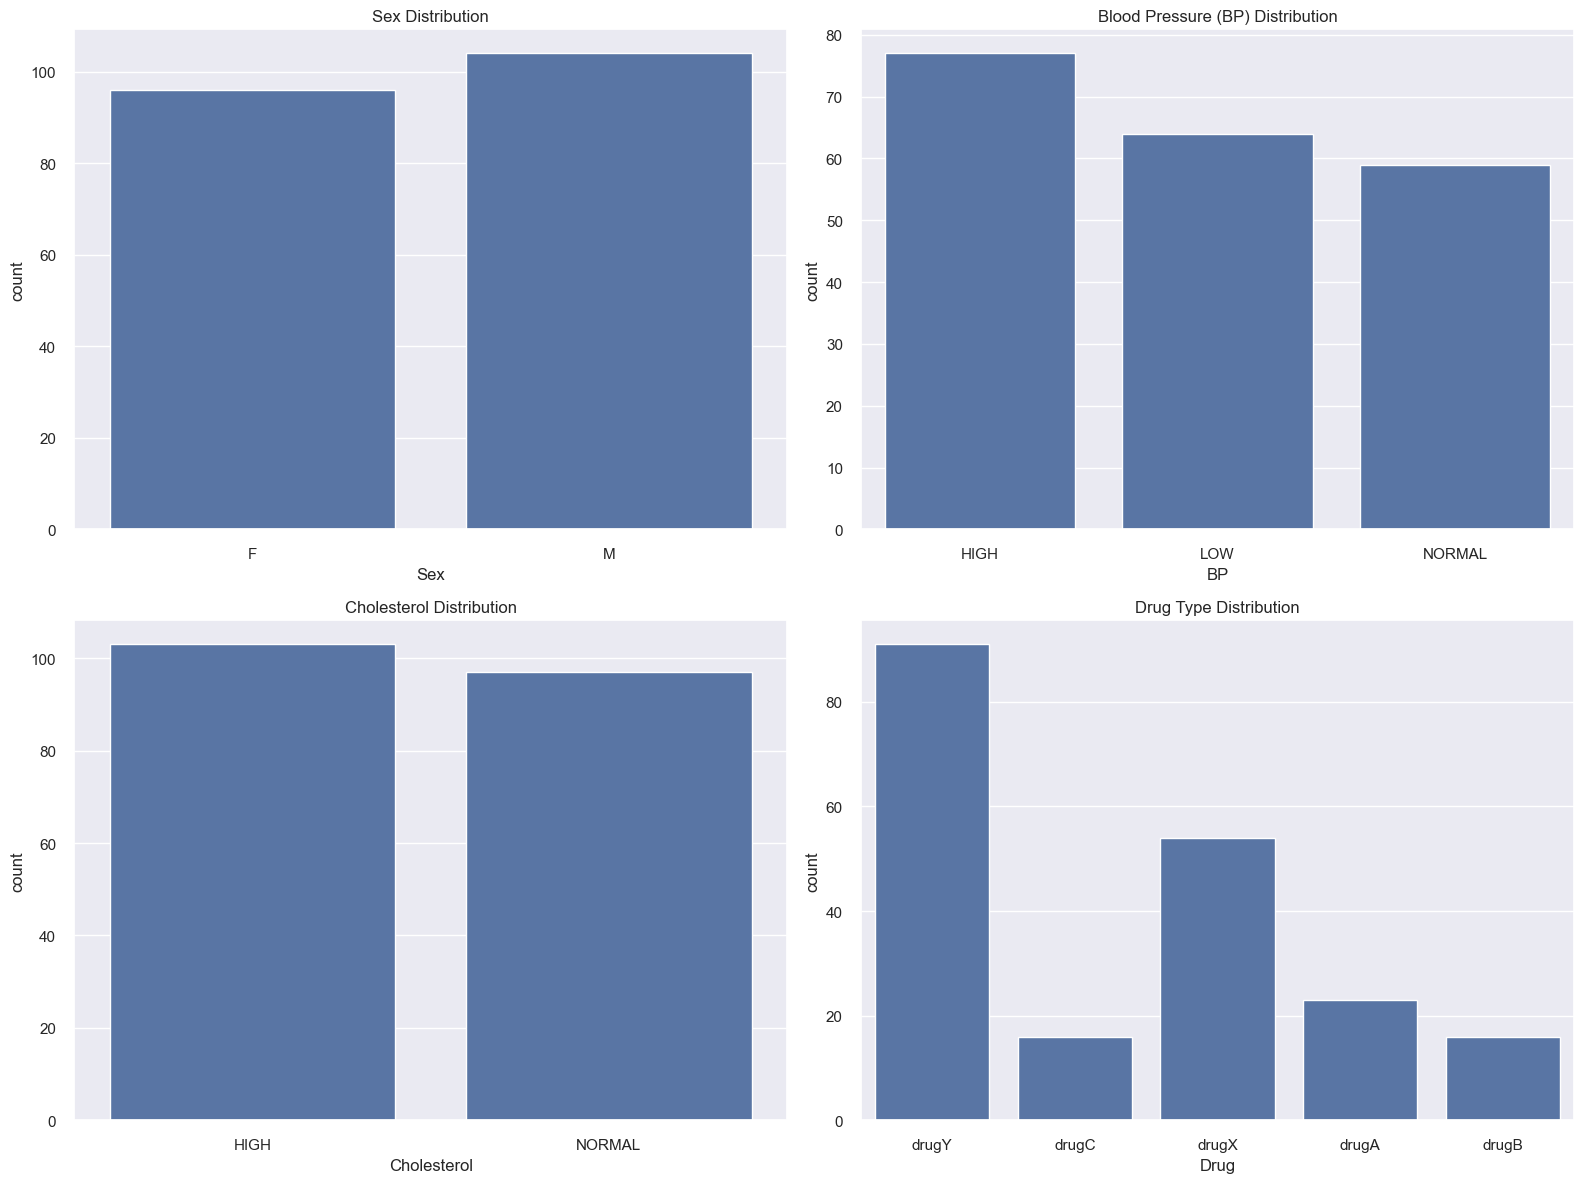

In [7]:
# Numerical Features Distribution
fig, ax = plt.subplots(1, 3, figsize=(24, 6))  # Adjust for 3 subplots
data['Age'].hist(ax=ax[0], bins=20, edgecolor='black')
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

data['Na'].hist(ax=ax[1], bins=20, edgecolor='black')  # Plot for Sodium
ax[1].set_title('Sodium (Na) Level Distribution')
ax[1].set_xlabel('Sodium Level')
ax[1].set_ylabel('Frequency')

data['K'].hist(ax=ax[2], bins=20, edgecolor='black')  # Plot for Potassium
ax[2].set_title('Potassium (K) Level Distribution')
ax[2].set_xlabel('Potassium Level')
ax[2].set_ylabel('Frequency')

plt.tight_layout()


# Categorical Features Distribution
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
sns.countplot(x='Sex', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Sex Distribution')

sns.countplot(x='BP', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Blood Pressure (BP) Distribution')

sns.countplot(x='Cholesterol', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Cholesterol Distribution')

sns.countplot(x='Drug', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Drug Type Distribution')

plt.tight_layout()

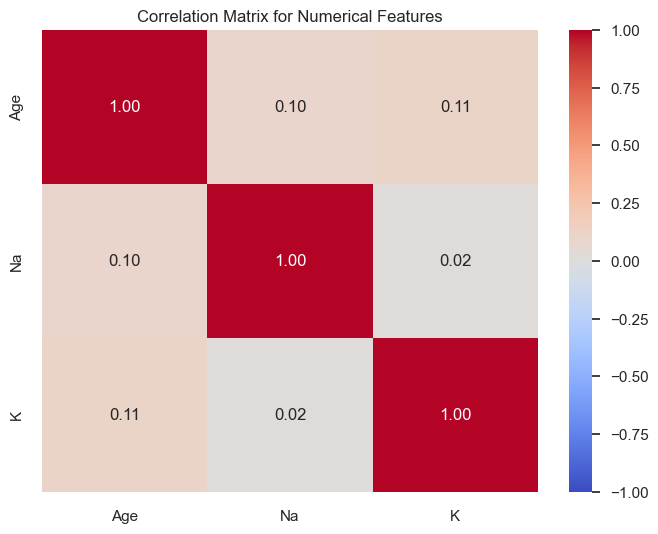

In [15]:
# 4. Correlation Analysis
# Calculating the correlation matrix for numerical features only
numerical_data = data[['Age', 'Na', 'K']]
correlation_matrix = numerical_data.corr()

# Creating a heatmap for the correlation matrix

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


In [ ]:

""" # Function to calculate VIF - Correlation between categorical variables.
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = np.array(['Sex','BP','Cholesterol'])
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

forVIF=data.drop(['Drug'],axis=1)
forVIF2= np.asarray(forVIF)
print(forVIF2)
calculate_vif(forVIF) """

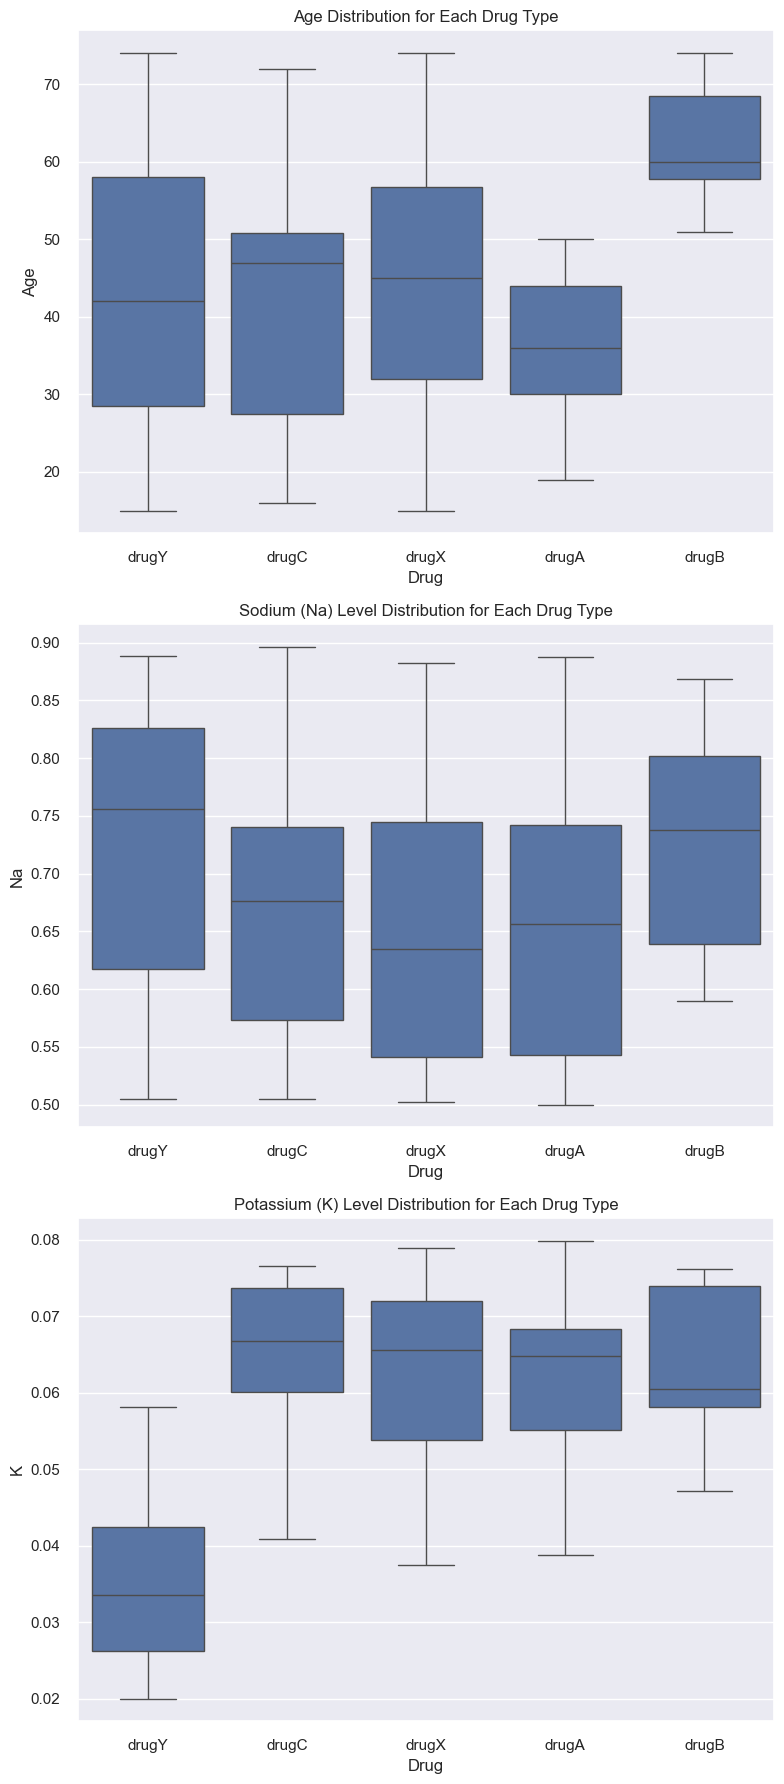

In [18]:
# 5. Feature vs. Target Analysis
fig, ax = plt.subplots(3, 1, figsize=(8, 18))

# Boxplot for Age vs Drug
sns.boxplot(x='Drug', y='Age', data=data, ax=ax[0])
ax[0].set_title('Age Distribution for Each Drug Type')

# Boxplot for Na vs Drug
sns.boxplot(x='Drug', y='Na', data=data, ax=ax[1])
ax[1].set_title('Sodium (Na) Level Distribution for Each Drug Type')

# Boxplot for K vs Drug
sns.boxplot(x='Drug', y='K', data=data, ax=ax[2])
ax[2].set_title('Potassium (K) Level Distribution for Each Drug Type')

plt.tight_layout()

AutoML with PyCaret

In [37]:
from pycaret.classification import *
from pycaret.datasets import get_data
#DataAutoML = get_data(data) #Aquí cambias el Dataset que te haya tocado.
ClassExperiment = ClassificationExperiment() #Instanciamos la clase
# init setup on exp
ClassExperiment.setup(data, target = 'Drug', session_id = 123)
#compare models using OOP
MejorModelo = ClassExperiment.compare_models(n_select = 1)
# save pipeline


,Description,Value
0,Session id,123
1,Target,Drug
2,Target type,Multiclass
3,Target mapping,"drugA: 0, drugB: 1, drugC: 2, drugX: 3, drugY: 4"
4,Original data shape,"(200, 7)"
5,Transformed data shape,"(200, 9)"
6,Transformed train set shape,"(140, 9)"
7,Transformed test set shape,"(60, 9)"
8,Numeric features,3
9,Categorical features,3


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9357,0.0000,0.9357,0.9379,0.9319,0.9039,0.9084,1.3290
lda,Linear Discriminant Analysis,0.9286,0.0000,0.9286,0.9443,0.9258,0.8958,0.9015,0.0160
gbc,Gradient Boosting Classifier,0.9071,0.0000,0.9071,0.9110,0.9013,0.8664,0.8731,0.0530
rf,Random Forest Classifier,0.8929,0.0000,0.8929,0.8861,0.8811,0.8441,0.8516,0.0280
et,Extra Trees Classifier,0.8714,0.0000,0.8714,0.8632,0.8576,0.8115,0.8212,0.0230
dt,Decision Tree Classifier,0.8286,0.0000,0.8286,0.8406,0.8154,0.7555,0.7690,0.0090
ada,Ada Boost Classifier,0.6000,0.0000,0.6000,0.5677,0.5355,0.4285,0.4658,0.0170
ridge,Ridge Classifier,0.5500,0.0000,0.5500,0.4287,0.4666,0.2659,0.3115,0.0090
nb,Naive Bayes,0.5357,0.0000,0.5357,0.3609,0.3993,0.4289,0.5236,0.0110
lr,Logistic Regression,0.5143,0.0000,0.5143,0.4817,0.4771,0.2663,0.2821,0.2450


In [36]:
# pip install shap
# Interpret the model
interpret_model(MejorModelo)
#save_model(ClassExperiment, 'BestLGBMModelEDA')

ValueError: _CURRENT_EXPERIMENT global variable is not set. Please run setup() first.